In [1]:
%tensorflow_version 2.x
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
# This will prompt for authorization.
from google.colab import drive
drive.mount('/content/drive')
print(tf.__version__)


Mounted at /content/drive
2.8.0


In [2]:
data_dir = "/content/drive/My Drive/affectnew"

In [3]:
batch_size = 80
img_height = 180
img_width = 180

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4104 files belonging to 2 classes.
Using 3078 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4104 files belonging to 2 classes.
Using 1026 files for validation.


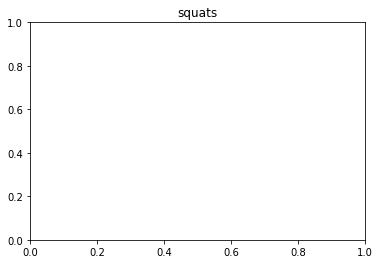

In [11]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    # ax = plt.subplot(3, 3, i + 1)
    # plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    # plt.axis("off")
# for images, labels in train_ds:
  # print(images.shape)
  # print(class_names)

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(80, 180, 180, 3)
(80,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0071241795 0.96926403


In [ ]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

# data_augmentation = tf.keras.Sequential(
#   [
#     tf.keras.layers.RandomFlip("horizontal",
#                       input_shape=(img_height,
#                                   img_width,
#                                   3)),
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
#   ]
# )

# model = tf.keras.Sequential([
#   data_augmentation,
#   tf.keras.layers.Rescaling(1./255),
#   tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes)
# ])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
# history = model.fit(train_ds, validation_data=val_ds, epochs=18)
# history=load_model('/content/drive/My Drive/2kimage.h5')
history=load_model('/content/drive/My Drive/2K_Image_Model.h5')

In [ ]:
# savedModel.summary()